In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import tensorflow as tf
import keras
import cv2
from PIL import Image
import matplotlib.pyplot as plt # to plot pretty figures
import seaborn as sns
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
from PIL import ImageFile # imports PIL module 
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
# directories path
train_dir = '../Dataset/Train'
test_dir = '../Dataset/Test'

In [4]:
# keras class to augment our images in real time, Data Generators
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale =1./255,
                                 validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir, # target directory
                                                   target_size = (224,224), # All images will be resized to 224 x 224
                                                   color_mode = 'rgb',
                                                    # Since we use categorical_crossentropy loss, we need binary labels
                                                   class_mode = 'categorical',
                                                    batch_size = 16,
                                                   subset = 'training')
validation_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                       batch_size = 16,
                                                       subset = 'validation')

Found 807 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [6]:
# groups a linear stack of layers into a tf.keras.Model 
model = tf.keras.Sequential()
model.add(VGG19(include_top = False,weights = 'imagenet',input_shape= (224,224,3)))
model.add(Flatten())
model.add(Dense(5,activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 25088)             0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 5)                 125445    
Total params: 20,149,829
Trainable params: 20,149,829
Non-trainable params: 0
_________________________________________________________________


In [8]:
optimizer = Adam(lr = 0.0001)
model.compile(loss = "categorical_crossentropy",optimizer = optimizer,metrics = ['accuracy'])
epochs = 25
batch_size = 16

C:\Users\utsav\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [9]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/25


C:\Users\utsav\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


51/51 [==============================] - 617s 12s/step - loss: 1.0683 - accuracy: 0.5898 - val_loss: 0.1759 - val_accuracy: 0.9239
Epoch 2/25
51/51 [==============================] - 599s 12s/step - loss: 0.4300 - accuracy: 0.8587 - val_loss: 0.0846 - val_accuracy: 0.9674
Epoch 3/25
51/51 [==============================] - 646s 13s/step - loss: 0.3577 - accuracy: 0.8922 - val_loss: 0.0490 - val_accuracy: 1.0000
Epoch 4/25
51/51 [==============================] - 583s 11s/step - loss: 0.2232 - accuracy: 0.9343 - val_loss: 0.0857 - val_accuracy: 0.9783
Epoch 5/25
51/51 [==============================] - 614s 12s/step - loss: 0.1633 - accuracy: 0.9542 - val_loss: 0.0410 - val_accuracy: 0.9783
Epoch 6/25
51/51 [==============================] - 740s 15s/step - loss: 0.1523 - accuracy: 0.9517 - val_loss: 0.0993 - val_accuracy: 0.9674
Epoch 7/25
51/51 [==============================] - 860s 17s/step - loss: 0.1884 - accuracy: 0.9380 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 8/25
51/51 

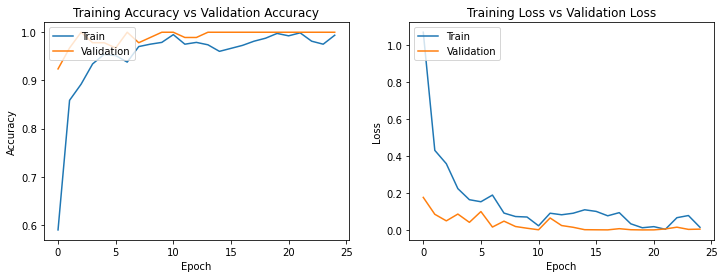

In [10]:
# Plotting graphs
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

# summarize history for accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [11]:
# returns the loss value & metrics values for the model in test mode
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

6/6 [==============================] - 17s 3s/step - loss: 0.0042 - accuracy: 1.0000
final train accuracy = 99.50 , validation accuracy = 100.00


In [ ]:
# the '.h5' extension indicates that the model should be saved to HDF5.
model.save('Yoga_Pose_Classifier.h5')

In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('Yoga_Pose_Classifier.h5')
img = image.load_img('../Dataset/Test/downdog/00000000.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes) 